In [1]:
#PROBLEM STATEMENT Perform sentimental analysis on the Elon-musk tweets

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

import warnings
import re
import string
import nltk

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")

In [4]:
df.head(30)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [7]:
df.Text = df.Text.astype(str)

In [8]:
# Clean The Data using RegEx
#result = re.sub(pattern, repl, string, count=0, flags=0)

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"_[A-Za-z0-9]", "", text)#Removing underscores

    
    return text
# Clean The Text
df["Text"] = df["Text"].apply(cleantext)
df.head()

,Text
0,Im an alien
1,Aarmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [9]:
df.tail()

,Text
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998,Progress update August 28


# VADER METHOD

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid= SentimentIntensityAnalyzer()

In [11]:
sid.polarity_scores(df.Text.iloc[2])

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [12]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sid.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0:
        return 'negative'
    else : 
        return 'neutral'
    
def get_sentiment(review):
    return pd.Series([sid.polarity_scores(review),get_senti_class(review)])

In [13]:
#Applying function to all tweets
df[["Scores", "Sentiment"]] = df.Text.apply(get_sentiment)
df

,Text,Scores,Sentiment
0,Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Aarmack Ray tracing on Cyberpunk with HDR is n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",positive
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
4,Congratulations Tesla China for amazing execu...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",positive
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative
1995,Make sure to read ur terms &amp; conditions b...,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",positive
1996,Samwise Gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...",negative


In [14]:
df.Sentiment.value_counts()

neutral     884
positive    883
negative    232
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

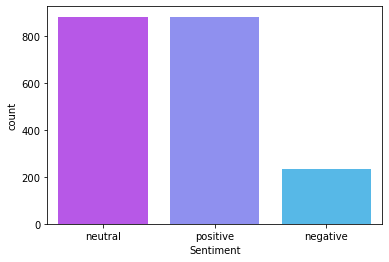

In [15]:
sns.countplot(df.Sentiment,palette='cool_r')

In [16]:
review_str = ' '.join(df['Text'].tolist())

In [17]:
import matplotlib.pyplot as plt

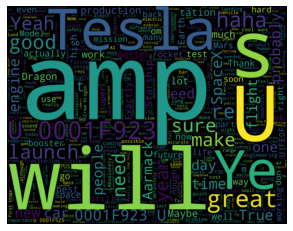

In [18]:
text = df.Text[0]

# Create and generate a word cloud image:
wordcloud= WordCloud(background_color="black", max_words=500,width=1800, height=1400).generate(review_str)
#figure(figsize=(2,3), dpi=400)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


In [19]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\sanjana\\Desktop\\Assigment\\NLP\\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

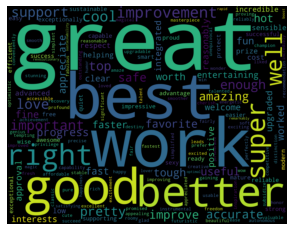

In [20]:
ip_pos_in_pos = " ".join ([w for w in review_str.split() if w in poswords])
wordcloud_pos = WordCloud(background_color='black',width=1800,height=1400).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos,interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:

# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\sanjana\\Desktop\\Assigment\\NLP\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

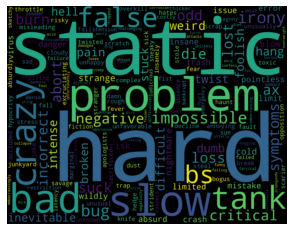

In [22]:
ip_neg_in_neg = " ".join ([w for w in review_str.split() if w in negwords])
wordcloud_neg = WordCloud(background_color='black',width=1800,height=1400).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg,interpolation="bilinear")
plt.axis("off")
plt.show()# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\sanjana\\Desktop\\Assigment\\NLP\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [23]:
# stop words # Choose the path for stop words stored in system
with open("C:\\Users\\sanjana\\Desktop\\Assigment\\NLP\\stop-words.txt","r") as stop:
  stopwords = stop.read().split("\n")


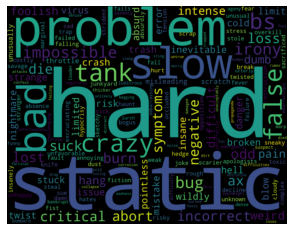

In [24]:
stopwords = " ".join ([w for w in review_str.split() if w in negwords])
wordcloud_stop = WordCloud(background_color='black',width=1800,height=1400).generate(stopwords)
plt.imshow(wordcloud_stop,interpolation="bilinear")
plt.axis("off")
plt.show()